In [286]:
"""
Clase: rnn

Objetivo: modelo

Cambios:

    1. Creacion de modelo aquesada 07-07-2025
"""

'\nClase: rnn\n\nObjetivo: modelo\n\nCambios:\n\n    1. Creacion de modelo aquesada 07-07-2025\n'

In [287]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler




In [288]:
df = pd.read_csv('../../data/processed/recomendaciones.csv',encoding = "ISO-8859-1",delimiter=',')

In [289]:
df.drop(columns=["YEAR", "MONTH"], inplace=True)

In [290]:
X = df.drop('Recomendacion',axis=1).values

In [291]:
y = df['Recomendacion']

In [292]:
y = pd.get_dummies(y)

In [293]:
y = y.values

In [294]:
y

array([[ True, False, False],
       [False, False,  True],
       [False, False,  True],
       ...,
       [False,  True, False],
       [False,  True, False],
       [False, False,  True]])

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101,stratify=y)

In [296]:
X_train.shape

(396, 5)

In [297]:
X_test.shape

(132, 5)

In [298]:
model = Sequential()
# Elegir número de capas (layers)
#https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
num_neuronas = X_train.shape[1]
# Indicar tantas neuronas de salida como clases a predecir, en este caso 3 (variable "Interest_Rate")
num_neuronas_salida = len(df["Recomendacion"].unique())
#Capa inicial usando Input
model.add(Dense(units=num_neuronas, activation='relu'))
model.add(Dense(units=num_neuronas, activation='relu'))
model.add(Dense(num_neuronas_salida, activation='softmax'))  # softmax para multiclase - softmax activation distribuye la probabilidad sobre cada nodo de salida (clase)

# Para clasificación multiclase "categorical_crossentropy"
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

In [299]:
# Convertir y_train de one-hot a etiquetas numéricas para calcular pesos de clase,ayudan a balancear el entrenamiento.
y_raw = np.argmax(y_train, axis=1) + 1

# Calcular pesos de clase
clases = np.unique(y_raw)
pesos = compute_class_weight(class_weight='balanced', classes=clases, y=y_raw)
pesos_dict = dict(zip(clases, pesos))


Pesos de clase: {np.int64(1): np.float64(1.1379310344827587), np.int64(2): np.float64(0.8407643312101911), np.int64(3): np.float64(1.0731707317073171)}


In [300]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [334]:
# Entrenar el modelo
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop],
           class_weight=pesos_dict
          )

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.9052 - loss: 0.2789 - val_categorical_accuracy: 0.9167 - val_loss: 0.2858
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.9094 - loss: 0.2750 - val_categorical_accuracy: 0.9167 - val_loss: 0.2853
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.9052 - loss: 0.2745 - val_categorical_accuracy: 0.9167 - val_loss: 0.2850
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.9039 - loss: 0.2778 - val_categorical_accuracy: 0.9167 - val_loss: 0.2847
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - categorical_accuracy: 0.9042 - loss: 0.2837 - val_categorical_accuracy: 0.9167 - val_loss: 0.2844
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.9065 - loss: 0.2787 - val_categorical_accuracy: 0.9167 - val_loss: 0.2842
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.9137 - loss: 0.2727 - va

<Axes: >

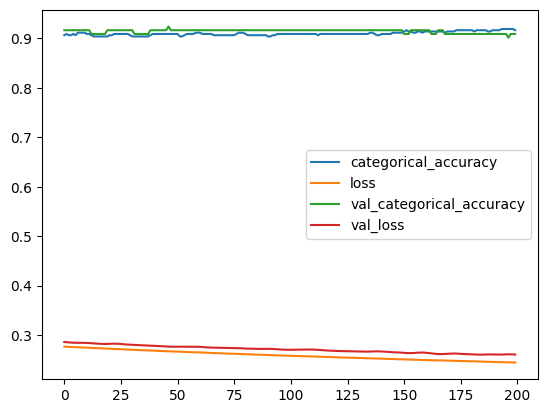

In [335]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [336]:
#Evaluacion del Modelo


In [337]:
#Predicción

predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [338]:
y_test

array([[False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [Fa

In [339]:
predictions

array([[5.08e-04, 9.61e-01, 3.82e-02],
       [9.76e-01, 2.31e-02, 4.34e-04],
       [9.96e-01, 6.98e-08, 3.55e-03],
       [2.38e-01, 7.62e-01, 6.66e-04],
       [1.30e-04, 1.00e+00, 2.22e-04],
       [8.84e-02, 1.47e-03, 9.10e-01],
       [1.02e-03, 9.94e-01, 4.67e-03],
       [8.22e-01, 2.89e-06, 1.78e-01],
       [9.97e-01, 6.87e-04, 1.98e-03],
       [4.06e-02, 5.20e-01, 4.39e-01],
       [9.08e-02, 8.67e-04, 9.08e-01],
       [3.45e-02, 1.66e-01, 8.00e-01],
       [5.16e-04, 9.96e-01, 3.75e-03],
       [1.32e-01, 8.55e-04, 8.67e-01],
       [9.77e-04, 9.98e-01, 5.31e-04],
       [4.30e-02, 6.86e-03, 9.50e-01],
       [1.31e-04, 9.99e-01, 1.15e-03],
       [7.17e-02, 3.93e-05, 9.28e-01],
       [9.95e-01, 3.39e-04, 4.82e-03],
       [9.97e-01, 3.43e-03, 2.23e-05],
       [3.20e-02, 5.47e-06, 9.68e-01],
       [7.97e-02, 1.76e-02, 9.03e-01],
       [2.73e-03, 9.87e-01, 1.06e-02],
       [1.18e-01, 3.69e-05, 8.82e-01],
       [6.69e-04, 9.98e-01, 9.21e-04],
       [4.93e-02, 1.70e-0

In [340]:
predictions_lab = np.argmax(model.predict(X_test), axis=-1)#Utilizando la nueva versión de scikit-learn

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [341]:
## Predice las clases para X_test y obtiene el índice de la clase con mayor probabilidad
predictions_lab

array([1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2,
       1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2,
       2, 0, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 2,
       0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1,
       2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1,
       0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1])

In [342]:
# Ajustar las predicciones
predictions_lab_real = predictions_lab+1

In [343]:
predictions_lab_real

array([2, 1, 1, 2, 2, 3, 2, 1, 1, 2, 3, 3, 2, 3, 2, 3, 2, 3, 1, 1, 3, 3,
       2, 3, 2, 3, 1, 1, 1, 2, 1, 2, 1, 3, 2, 2, 2, 3, 2, 3, 2, 1, 1, 3,
       3, 1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 3, 3, 2, 3,
       1, 3, 2, 3, 3, 3, 2, 1, 1, 3, 1, 1, 3, 2, 3, 3, 1, 2, 2, 1, 2, 2,
       3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 2, 1, 2, 3, 3, 2, 2, 3, 3, 1, 2, 2,
       1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 3, 1, 2, 1, 2, 3, 2, 3, 2, 2, 2, 2])

In [344]:
df_test_lab = pd.DataFrame(y_test, columns = ['Riego','Fertilización','Poda Preventiva'])

In [345]:
df_test_lab

,Riego,Fertilización,Poda Preventiva
0,False,True,False
1,True,False,False
2,True,False,False
3,False,True,False
4,False,True,False
...,...,...,...
127,False,False,True
128,False,True,False
129,False,True,False
130,False,True,False


In [346]:
df_test_lab["Clase Real"] = df_test_lab[["Riego", "Fertilización", "Poda Preventiva"]].values.argmax(axis=1) + 1

In [347]:
df_test_lab["Clase Real"]

0      2
1      1
2      1
3      2
4      2
      ..
127    3
128    2
129    2
130    2
131    2
Name: Clase Real, Length: 132, dtype: int64

In [348]:
clases=[1, 2, 3]

In [349]:
#Convertir Clase Real en un array
array_clase_real = df_test_lab["Clase Real"].to_numpy()

In [350]:
#Generar la Matriz de confusion
confusion_matrix(array_clase_real, predictions_lab_real, labels=clases)

array([[34,  2,  2],
       [ 4, 48,  1],
       [ 1,  2, 38]])

In [351]:
#Funcion para mostrar Matrix de confusion
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python/40068
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix sin normalizar
[[34  2  2]
 [ 4 48  1]
 [ 1  2 38]]


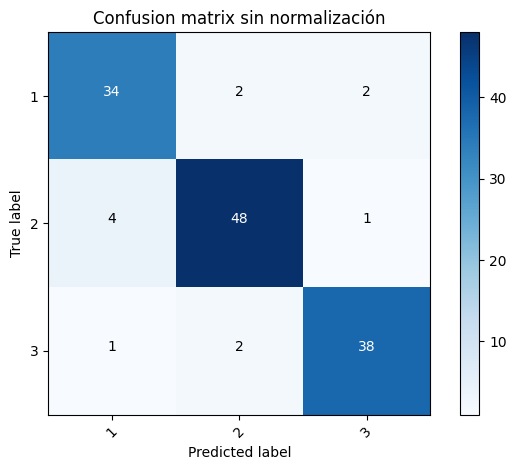

In [352]:
#Mostrar grafico de Matrix de confusion
cnf_matrix = confusion_matrix(array_clase_real, predictions_lab_real, labels=clases)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clases,
                      title='Confusion matrix sin normalización')

In [353]:
#Verificar el % de aciertos
print(classification_report(array_clase_real, predictions_lab_real))

              precision    recall  f1-score   support

           1       0.87      0.89      0.88        38
           2       0.92      0.91      0.91        53
           3       0.93      0.93      0.93        41

    accuracy                           0.91       132
   macro avg       0.91      0.91      0.91       132
weighted avg       0.91      0.91      0.91       132



In [354]:
# Predicción sobre nuevos datos

#Guardar Dataset preprocesado
df.to_csv('rnn_papa_preprocessed.csv', index=False)


In [355]:
#Cargar Dataset Preprocesado
df_pred = pd.read_csv('rnn_papa_preprocessed.csv')
df_pred.head()

,lluvia_mm,temp_max,temp_min,humedad,ph_suelo,Recomendacion
0,0.100886,0.066351,0.364952,0.731096,0.632721,1
1,0.126300,0.142180,0.337621,0.761342,0.687813,3
2,0.052368,0.330569,0.615756,0.722590,0.520868,3
3,0.025799,0.040284,0.196141,0.665879,0.631052,1
4,0.073931,0.013033,0.393891,0.644612,0.836394,1


In [356]:
#Eliminar columnas y scalar con resultados anteriores
X_pred = df_pred.drop(['Recomendacion'], axis=1).values


In [357]:
df['Recomendacion'].value_counts()

Recomendacion
2    210
3    164
1    154
Name: count, dtype: int64

In [358]:
#Escalar df
escalador = MinMaxScaler()

# columnas numéricas:
normalizar = ['lluvia_mm', 'temp_max', 'temp_min', 'humedad', 'ph_suelo']

# Aplica la normalización
df[normalizar] = escalador.fit_transform(df[normalizar])


In [359]:
X_pred = escalador.transform(X_pred)
#Realizar predicción
resultado = np.argmax(model.predict(X_pred), axis=-1) + 1

#Unir en un dataframe los datos a predecir con su predicción
df_pred['PREDICCIÓN']=pd.DataFrame(resultado)
df_pred

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


D:\cuc\Fundamentos de IA\AGRO IAPythonProject\Proyecto AGROAI GIT\streamlit\Agro-IA-Module-3\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,lluvia_mm,temp_max,temp_min,humedad,ph_suelo,Recomendacion,PREDICCIÓN
0,0.100886,0.066351,0.364952,0.731096,0.632721,1,3
1,0.126300,0.142180,0.337621,0.761342,0.687813,3,3
2,0.052368,0.330569,0.615756,0.722590,0.520868,3,1
3,0.025799,0.040284,0.196141,0.665879,0.631052,1,3
4,0.073931,0.013033,0.393891,0.644612,0.836394,1,3
...,...,...,...,...,...,...,...
523,0.413939,0.109005,0.265273,0.876654,0.879800,3,3
524,0.160185,0.151659,0.731511,0.864367,0.661102,3,3
525,0.129765,0.092417,0.570740,0.829868,0.181970,2,2
526,0.185599,0.279621,0.765273,0.864839,0.485810,2,2


In [363]:
# Guardar df con predicciones
df_pred.to_csv('predicciones.csv', index=False)

In [360]:
#Guardar el modelo
from tensorflow.keras.models import load_model
model.save('modelo_pred_cultivopapa.h5')